   Ranking                  Username  Subscribers   Uploads         Views  \
0      1.0                   MrBeast  336000000.0     838.0  6.685363e+10   
1      2.0                  T-Series  281000000.0   22313.0  2.772428e+11   
2      3.0  Cocomelon-Nursery Rhymes  186000000.0    1370.0  1.943618e+11   
3      4.0            Youtube Movies  185000000.0       0.0  0.000000e+00   
4      5.0                 Set India  180000000.0  148727.0  1.727090e+11   

  Country  
0      US  
1      IN  
2      US  
3     NaN  
4      IN  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ranking      100 non-null    float64
 1   Username     100 non-null    object 
 2   Subscribers  101 non-null    float64
 3   Uploads      101 non-null    float64
 4   Views        101 non-null    float64
 5   Country      94 non-null     object 
dtypes: float64(4), objec

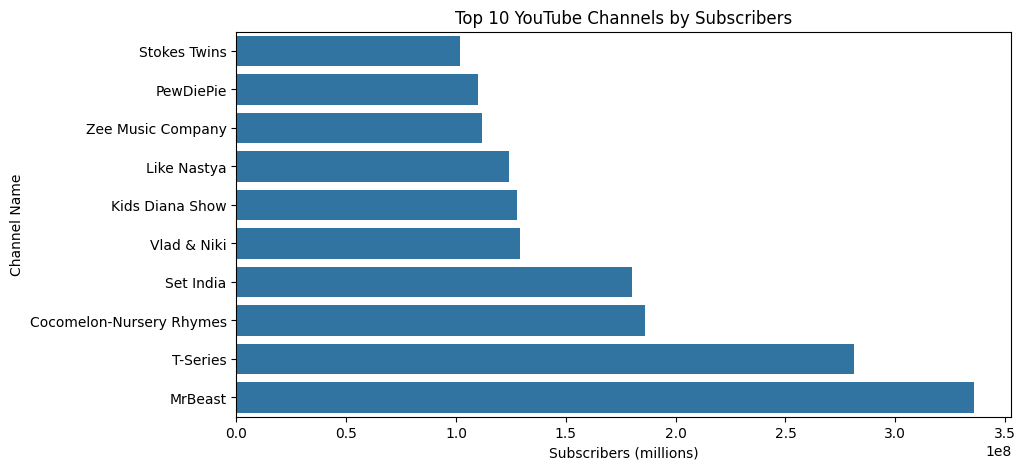

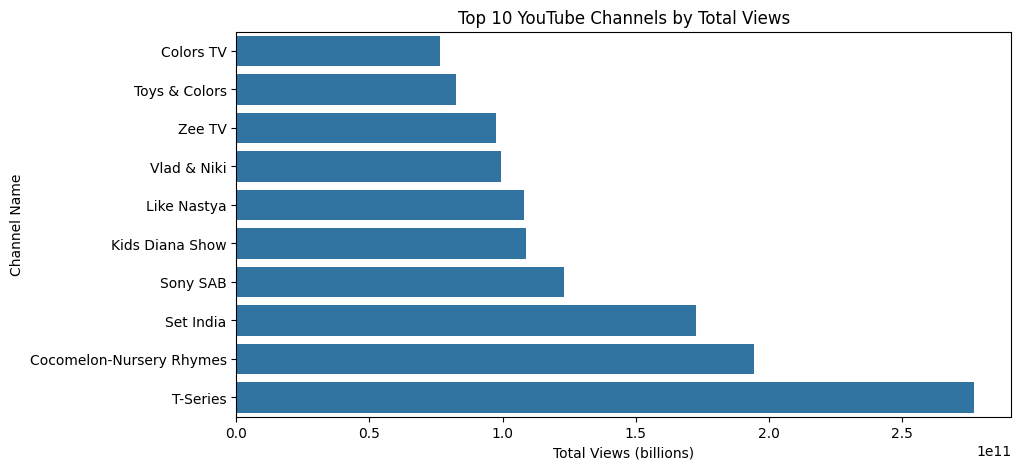

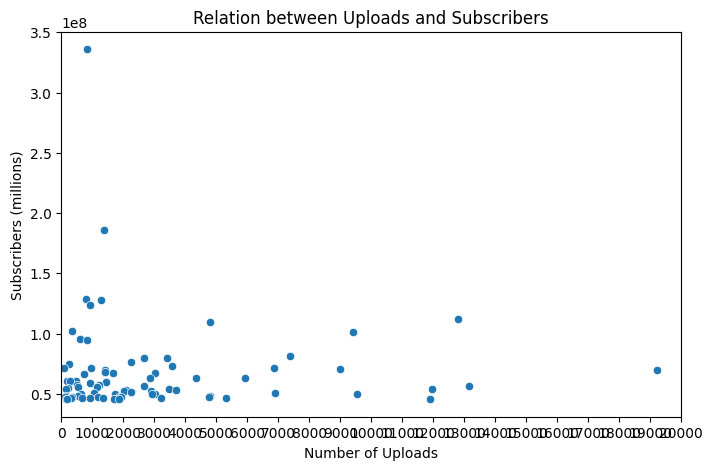

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 

# Read data
import pandas as pd

data = pd.read_csv("ytubedata.csv")

def convert_to_number(x):
    """
    Converts strings like '336M', '2.4B', '120K' to actual numbers.
    Handles empty, NaN, or invalid entries safely.
    """
    if pd.isna(x):
        return 0
    if isinstance(x, str):
        x = x.replace(',', '').strip()
        if x == '' or x.lower() == 'nan':
            return 0
        try:
            if x.endswith('M'):
                return float(x[:-1]) * 1_000_000
            elif x.endswith('B'):
                return float(x[:-1]) * 1_000_000_000
            elif x.endswith('K'):
                return float(x[:-1]) * 1_000
            else:
                return float(x)
        except:
            return 0
    else:
        return float(x)

# 🔹 Apply conversion to main numeric columns
for col in ['Subscribers', 'Views', 'Uploads']:
    if col in data.columns:
        data[col] = data[col].apply(convert_to_number)
    else:
        data[col] = 0

print(data.head())
print(data.info())
  # if column missing, create with zeros

# Basic info
print(data.head())
print("\nData Info:\n")
data.info()

# Missing values
print("\nMissing Values:\n", data.isnull().sum())

# Remove missing rows
data.dropna(inplace=True)

# Basic stats
print("\nTop Channels:", data.shape[0])
print("Unique Countries:", data['Country'].nunique())
print("Most Common Country:", data['Country'].mode()[0])
print("middle value is",data['Country'].median())

# ---- Top 10 by Subscribers ----
top10 = data.sort_values('Subscribers', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='Subscribers', y='Username', data=top10 [::-1])
plt.title("Top 10 YouTube Channels by Subscribers")
plt.xlabel("Subscribers (millions)")
plt.ylabel("Channel Name")
plt.show()

# ---- Top 10 by Views ----
top10_views = data.sort_values('Views', ascending=False).head(10)

plt.figure(figsize=(10,5))
sns.barplot(x='Views', y='Username', data=top10_views [::-1])
plt.title("Top 10 YouTube Channels by Total Views")
plt.xlabel("Total Views (billions)")
plt.ylabel("Channel Name")
plt.show()

# ---- Uploads vs Subscribers ----
plt.figure(figsize=(8,5))
sns.scatterplot(x='Uploads', y='Subscribers', data=data) 
plt.title("Relation between Uploads and Subscribers")
plt.xlabel("Number of Uploads")
plt.ylabel("Subscribers (millions)")
plt.xlim(0, 20000)
plt.xticks(range(0, 20001, 1000)) 
plt.show()